# Budget Analysis

---

## Environment Setup

In [10]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [11]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [12]:
# Set environment variables from the .env file
load_dotenv()

True

In [13]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [14]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [15]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [64]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token
print()

### 3. Exchange the public token for an access token

In [65]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access token
print()

In [66]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']
print()

### 4. Fetch Accounts

In [19]:
# Retrieve accounts
client.Accounts.get(access_token)

# Print accounts

{'accounts': [{'account_id': 'XlyLajLVlvFa8VRpBZvpFgdd8xEk7gudAWvqG',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'D3PlMdlz3AsoVX36NeM6Fe33gZRQqeSvqPLxk',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'V8bMxNMy8vt3gw7RXekRCk33Q4vjykIWM8ZeX',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [21]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "D3PlMdlz3AsoVX36NeM6Fe33gZRQqeSvqPLxk",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-07-14",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": null,
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
   

### 2. Print the categories for each transaction

In [29]:
# Create a for-loop to print the categories for each transaction
all_categories = []
for transactions in transaction_response['transactions']:
    category = transactions['category'][0]
    all_categories.append(category)
    print(category)

Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [34]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
all_dates = []
all_names = []
all_amounts = []
all_categories = []

# Retrieve all the transactions
for transactions in transaction_response['transactions']:
    category = transactions['category'][0]
    all_categories.append(category)
    all_dates.append(transactions['date'])
    all_names.append(transactions['name'])
    all_amounts.append(transactions['amount'])

    # Populate the transactions DataFrame with the transactions data
transactions_df = pd.DataFrame(list(zip(all_dates, all_names, all_amounts, all_categories)),
                              columns = ['Date', 'Name', 'Amount', 'Category'])
    
# Display sample data from the DataFrame    
transactions_df.head(10)

,Date,Name,Amount,Category
0,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
1,2020-07-14,Uber 063015 SF**POOL**,5.40,Travel
2,2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
3,2020-07-13,CD DEPOSIT .INITIAL.,1000.00,Transfer
4,2020-07-12,Touchstone Climbing,78.50,Recreation
5,2020-07-12,United Airlines,-500.00,Travel
6,2020-07-11,McDonald's,12.00,Food and Drink
7,2020-07-11,Starbucks,4.33,Food and Drink
8,2020-07-10,SparkFun,89.40,Food and Drink
9,2020-07-09,INTRST PYMNT,-4.22,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [35]:
# Display data types
# Make any required data type transformation
# Set the date column as index
# Display sample data

transactions_df['Name'].astype(str)
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'])
transactions_df.set_index('Date',inplace=True)
transactions_df['Amount'].astype(float)
print(transactions_df.dtypes)
transactions_df.head()

Name         object
Amount      float64
Category     object
dtype: object


,Name,Amount,Category
Date,,,
2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
2020-07-14,Uber 063015 SF**POOL**,5.4,Travel
2020-07-13,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
2020-07-13,CD DEPOSIT .INITIAL.,1000.0,Transfer
2020-07-12,Touchstone Climbing,78.5,Recreation


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [47]:
# Fetch de income data
client.Accounts.get(access_token)
gross_income = client.Income.get(access_token)
gross_income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 720,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'MzS5fV56IiwalRS'}

In [42]:
# Determine the previous year's gross income and print the results
last_year_gross_income = gross_income['income']['last_year_income_before_tax']
print(f"Previous Year's Gross Income: ${last_year_gross_income:,}")

Previous Year's Gross Income: $7,285


In [43]:
# Determine the current monthly income and print the results
monthly_income = gross_income['income']['income_streams'][0]['monthly_income']
print(f"Current Monthly Income: ${monthly_income}")

Current Monthly Income: $500


In [45]:
# Determine the projected yearly income and print the results
projected_yearly_income = monthly_income * 12
print(f"Projected Yearly Income: ${projected_yearly_income:,}")

Projected Yearly Income: $6,000


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [50]:
# Compute the total expenses per category
df_category_sum = transactions_df.filter(['Category','Amount'])
grouped = df_category_sum.groupby(['Category']).sum()
grouped.columns = ['Total Spending Per Category']
grouped.sort_values('Total Spending Per Category',ascending=False,inplace=True)
# Display the expenses per catefory
print(grouped)

                Total Spending Per Category
Category                                   
Transfer                           20537.34
Payment                             6310.50
Food and Drink                      3317.19
Shops                               1500.00
Recreation                           235.50
Travel                                35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff648c120f0>],
      dtype=object)

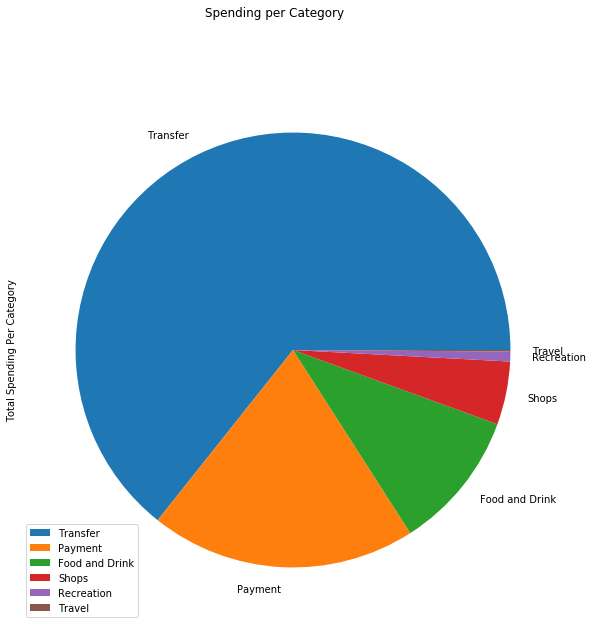

In [55]:
# Create a spending categories pie chart.
grouped.plot.pie(subplots=True,figsize=(20,10), title="Spending per Category")

### Calculate the expenses per month

In [56]:
# Create a DataFrame with the total expenses
df_amounts = transactions_df.filter(['Date','Amount'])
df_amounts.index = pd.to_datetime(df_amounts.index)
month_grouped = df_amounts.groupby(df_amounts.index.month).sum()
month_grouped.sort_index()

# Display sample data
print(month_grouped)

        Amount
Date          
4      4084.83
5     10645.24
6     10645.24
7      6560.41


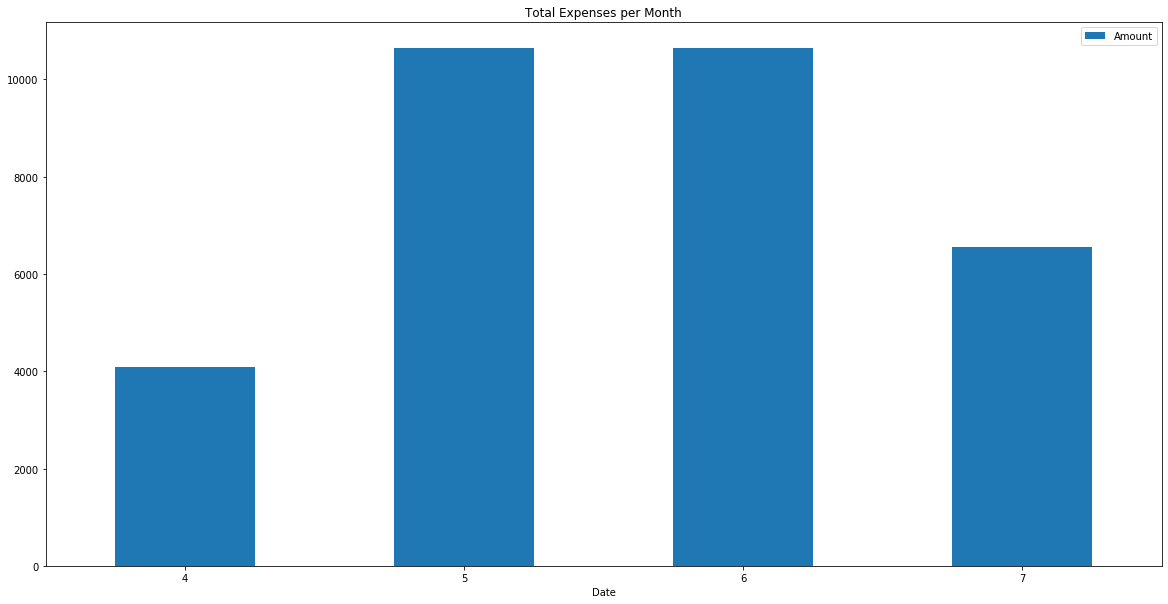

In [63]:
# Create a spending per month bar chart
month_grouped.plot(kind="bar",rot=0, title="Total Expenses per Month", figsize=(20,10))
